In [2]:
# coding: utf-8
# libraries & packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from random import randint
import sys

from keras.models import Sequential
from keras.models import load_model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.optimizers import SGD, Adam
from keras.utils import np_utils
from sklearn.utils import shuffle

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [3]:
# load data
def load_data(train_data_path, test_data_path):
    train = pd.read_csv(train_data_path, sep=',', header=0)
    test = pd.read_csv(test_data_path, sep=',', header=0)
    return (train, test)

def split_valid_set(X_all, Y_all, percentage):
    all_data_size = len(X_all)
    valid_data_size = int(math.floor(all_data_size * (1-percentage)))

#     X_all = shuffle(X_all)
#     Y_all = shuffle(Y_all)
    X_train, Y_train = X_all[0:valid_data_size], Y_all[0:valid_data_size]
    X_valid, Y_valid = X_all[valid_data_size:], Y_all[valid_data_size:]

    return X_train, Y_train, X_valid, Y_valid

def _sep(x):
    x = x.split(" ")
    x = np.array(x).astype("float32")
    return x

def sep_reshape(raw_data):
#     raw_data = pd.DataFrame(raw_data)
    data = raw_data.apply(_sep)
    data2 = np.stack(data).reshape((len(data),1,48,48))
    return data2

# Plot
# 隨機畫出 27張圖
# 0：生氣, 1：厭惡, 2：恐懼, 3：高興, 4：難過, 5：驚訝, 6：中立(難以區分為前六種的表情)

def plot_expressions(X,Y):
    emo = {0:"anger", 1:"hate", 2:"fear", 3:"happy", 4:"sad", 5:"suprise", 6:"normal"}
    number = 0
    fig = plt.figure()
    fig.set_figwidth(18)
    fig.set_figheight(5)
    for i in range(0,27):
        plt.subplot(3,9,i+1)
        j = randint(0, len(X))
        plt.imshow(X[j][0],plt.cm.gray)
        plt.title(emo[Y[j]])
        plt.xticks([])
        plt.yticks([])

# 驗證
def plot_acc_loss(history):
#     plt.clf()
    fig = plt.figure()
    fig.set_figwidth(10)
    plt.subplot(1,2,1)
    plt.xlabel('Epoch')
    plt.ylabel('loss')
    plt.title('Training data') 
    plt.plot(history.history['loss']) 
    plt.plot(history.history['val_loss']) 
    plt.legend(['training','validation'],loc='lower right') 
    
    plt.subplot(1,2,2)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training data') 
    plt.plot(history.history['acc']) 
    plt.plot(history.history['val_acc']) 
    plt.legend(['training','validation'],loc='lower right') 
    plt.show()

In [4]:
data_path = '/Users/PK/.kaggle/competitions/ml-2017fall-hw3/'
train, test = load_data(data_path + "train.csv", data_path + "test.csv")
X_train_raw =train["feature"]
Y_train_raw =train["label"]
X_test_raw =test["feature"]
print(train.head())
print(X_train_raw.shape, Y_train_raw.shape, X_test_raw.shape)

percentage = 0.2
X_train, Y_train_raw, X_valid, Y_valid_raw = split_valid_set(X_train_raw,Y_train_raw, percentage)
print(X_train.shape, Y_train_raw.shape, X_valid.shape, Y_valid_raw.shape)

# Reshape
classes = 7
X_train = sep_reshape(X_train)
X_valid = sep_reshape(X_valid)
X_test = sep_reshape(X_test_raw)

# normalize inputs from 0-255 to 0.0-1.0X_train /= 255.0
X_train /= 255.0
X_valid /= 255.0
X_test /= 255.0

# 1-of-N encoding
Y_train = np_utils.to_categorical(np.array(Y_train_raw), classes)
Y_valid = np_utils.to_categorical(np.array(Y_valid_raw), classes)


print(X_train.shape, X_valid.shape,Y_train.shape, Y_valid.shape)

   label                                            feature
0      0  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1      0  151 150 147 155 148 133 111 140 170 174 182 15...
2      2  231 212 156 164 174 138 161 173 182 200 106 38...
3      4  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4      6  4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...
(28709,) (28709,) (7178,)
(22967,) (22967,) (5742,) (5742,)
(22967, 1, 48, 48) (5742, 1, 48, 48) (22967, 7) (5742, 7)


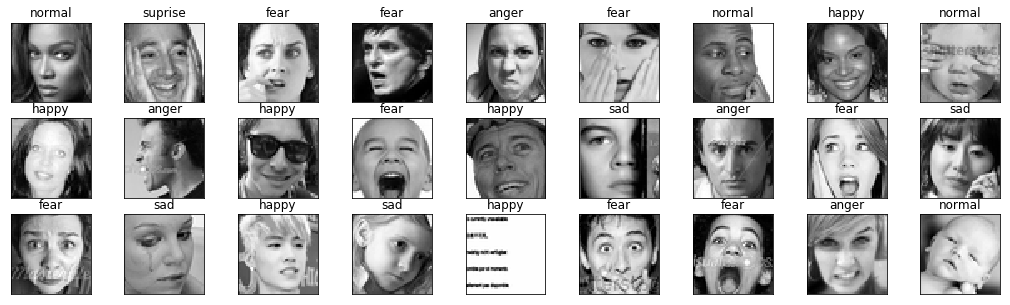

In [5]:
# Plot
# 隨機畫出 27張圖
# 0：生氣, 1：厭惡, 2：恐懼, 3：高興, 4：難過, 5：驚訝, 6：中立(難以區分為前六種的表情)

plot_expressions(X_train,Y_train_raw)